<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/linear_regression/01_workshop_linear_regresion_beisbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [3]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# **Hipotesis**
---
Existe una relación entre el número de veces que batean los jugadores de un equipo de beisbol y el número de runs que consiguen.


# **Data**
---


In [4]:
teams = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

In [5]:
data = pd.DataFrame({
    'Equipos': teams,
    'Bateos': bateos,
    'Runs': runs
})

In [6]:
data.head(3)

,Equipos,Bateos,Runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


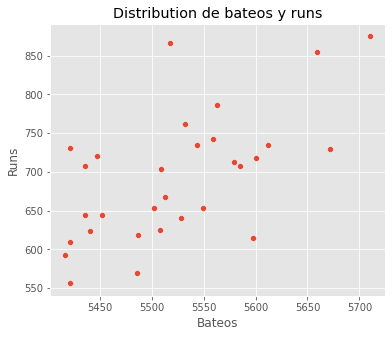

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(x='Bateos', y='Runs', data=data, ax=ax)
ax.set_title('Distribution de bateos y runs')
plt.show()

**Analisis de correlación**

In [8]:
corr_test = pearsonr(x=data['Bateos'], y=data['Runs'])
print(f'Coeficiente de Pearson {corr_test[0]}')
print(f'P-value {corr_test[1]}')

Coeficiente de Pearson 0.6106270467206688
P-value 0.0003388351359791963


El grafico y el test de correlación muestran una relación lineal, de intensidad considerable (r=0.61) y significativa (p-value = 0.000338). Lo anterior indica que se puede crear un modelo de regresión lineal con el objetivo de predecir el número de Runs en función del número de bateos del equipo.

# **Ajuste del modelo**
---

In [9]:
X = data[['Bateos']]
y = data[['Runs']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [11]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1, 1)

# **Creación modelo**
---

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Información del modelo**
---

In [13]:
print(f'Intercept: {model.intercept_}')
print(f'Coeficiente: {list(zip(X.columns, model.coef_.flatten(), ))}')
print(f'Coeficiente de determinación R^2 {model.score(X,y)}')

Intercept: [-2367.7028413]
Coeficiente: [('Bateos', 0.5528713534479736)]
Coeficiente de determinación R^2 0.3586119899498744


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# **Evaluación del modelo**
---

In [14]:
predict = model.predict(X_test)

In [15]:
rmse = mean_squared_error(y_test, predict, squared=False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 59.336716083360486


# **Referencia**
---
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html